# Lasso Regression Part 2

Lasso Regression (Least Absolute Shrinkage and Selection Operator) is a method that performs both variable selection and regularization in order to enhance the prediction accuracy and interpretability of the statistical model it produces.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

# yfinance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AMD'
start = '2014-01-01'
end = '2018-08-27'

# Read data 
dataset = yf.download(symbol,start,end)

# View Columns
dataset.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,3.85,3.98,3.84,3.95,3.95,20548400
2014-01-03,3.98,4.00,3.88,4.00,4.00,22887200
2014-01-06,4.01,4.18,3.99,4.13,4.13,42398300
2014-01-07,4.19,4.25,4.11,4.18,4.18,42932100
2014-01-08,4.23,4.26,4.14,4.18,4.18,30678700


In [3]:
X = dataset[['Open','High', 'Low']]
Y = dataset['Adj Close']

In [4]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train,X_test,y_train,y_test=train_test_split(X,Y, test_size=0.3, random_state=0)

In [5]:
model = Lasso()
model.fit(X_train,y_train)
train_score=model.score(X_train,y_train)
test_score=model.score(X_test,y_test)
coeff_used = np.sum(model.coef_!=0)

In [6]:
print("Training score:", train_score)
print("Test score: ", test_score)
print("Number of features used: ", coeff_used)
print("Accuracy Score: ", model.score(X_test, y_test))

Training score: 0.9973093795349899
Test score:  0.9969665035737365
Number of features used:  1
Accuracy Score:  0.9969665035737365


In [7]:
r_squared = model.score(X_test, y_test)
print("The model can predict {0:.1%} of the variance in the test set.".format(r_squared))

The model can predict 99.7% of the variance in the test set.


In [8]:
zero_coef = model.coef_ == 0

In [9]:
n_ignored = sum(zero_coef)
print("The model has ignored {} out of {} features.".format(n_ignored, len(model.coef_)))

The model has ignored 2 out of 3 features.


In [10]:
model = Lasso(alpha=0.1, random_state=0)

# Fits the model and calculates performance stats
model.fit(X_train, y_train)
r_squared = model.score(X_test, y_test)
n_ignored_features = sum(model.coef_ == 0)

# Print peformance stats 
print("The model can predict {0:.1%} of the variance in the test set.".format(r_squared))
print("{} out of {} features were ignored.".format(n_ignored_features, len( model.coef_)))

The model can predict 99.9% of the variance in the test set.
0 out of 3 features were ignored.


In [11]:
model.score(X_test, y_test)

0.9990981079535755

In [12]:
from sklearn.metrics import r2_score

y_pred_lasso = model.fit(X_train, y_train).predict(X_test)
r2_score_lasso = r2_score(y_test, y_pred_lasso)

print("r^2 on test data : %f" % r2_score_lasso)

r^2 on test data : 0.999098


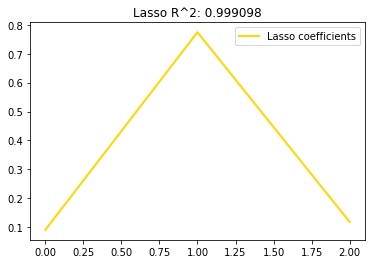

In [13]:
plt.plot(model.coef_, color='gold', linewidth=2,
         label='Lasso coefficients')
plt.legend(loc='best')
plt.title("Lasso R^2: %f" % (r2_score_lasso))
plt.show()